### Predicting Exam Scores Using a Neural Network

In [1]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
# Set random seed for reproducibility
torch.manual_seed(42)

We're defining the neural network with the following parameters:
- **Three hidden layers** with 64, 32, 16 neurons respectively
- We use the **LeakyReLU** activation function instead of ReLU to prevent dying neurons (from ReLU), this ensures that neurons can still learn even when they output negative values.
- **Adam** is chosen as the optimizer because it adapts learning rates for each parameter, this leads to faster convergence and better performance on small datasets like this one without too much hyperparameter tuning.


In [3]:
# Define a simple neural network for predicting exam scores
class ExamScoreNN(nn.Module):
    def __init__(self):
        super(ExamScoreNN, self).__init__()
        # Define the first hidden layer
        self.hidden1 = nn.Linear(4,64)
        # Define the second hidden layer
        self.hidden2 = nn.Linear(64,32)
        # Define the third hidden layer
        self.hidden3 = nn.Linear(32,16)
        # Define the output layer with 1 neuron
        self.output = nn.Linear(16,1)


    def forward(self, x):
        # Apply ReLU activation to the hidden layer
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        x = torch.relu(self.hidden3(x))
        # Pass the result through the output layer
        x = self.output(x)
        return x


In [4]:
# Instantiate the neural network
model = ExamScoreNN()

# Print the model architecture
print("Model Architecture:")
print(model)

Model Architecture:
ExamScoreNN(
  (hidden1): Linear(in_features=4, out_features=64, bias=True)
  (hidden2): Linear(in_features=64, out_features=32, bias=True)
  (hidden3): Linear(in_features=32, out_features=16, bias=True)
  (output): Linear(in_features=16, out_features=1, bias=True)
)


In [5]:
# Dataset: Features [Hours Studied, Hours of Sleep Before Exam, Total Attendance, Ability]
data = torch.tensor([
[1.0, 5.0, 80.0, 60.0],
[2.0, 6.0, 85.0, 65.0],
[3.0, 4.0, 90.0, 70.0],
[4.0, 7.0, 95.0, 75.0],
[5.0, 8.0, 100.0, 80.0],
[2.5, 6.5, 88.0, 68.0],
[3.5, 5.0, 92.0, 72.0],
[1.5, 4.5, 78.0, 58.0],
[6.0, 9.0, 110.0, 85.0],
[4.5, 7.5, 98.0, 77.0],
[3.0, 5.5, 87.0, 69.0],
[2.0, 4.0, 83.0, 63.0],
[7.0, 10.0, 120.0, 90.0],
[5.5, 8.5, 102.0, 82.0],
[6.5, 9.5, 115.0, 88.0],
[4.0, 6.0, 93.0, 74.0],
[3.5, 6.5, 89.0, 71.0],
[1.0, 3.5, 75.0, 55.0]
])
# Labels: [Exam Scores]
labels = torch.tensor([
[50.0],
[65.0],
[70.0],
[85.0],
[90.0],
[75.0],
[80.0],
[55.0],
[95.0],
[88.0],
[72.0],
[60.0],
[100.0],
[92.0],
[98.0],
[83.0],
[78.0],
[52.0]
])

In [6]:
# Define the loss function (Mean Squared Error)
criterion = nn.MSELoss()

# Define the optimizer (Adam)
optimizer = optim.Adam(model.parameters(), lr=0.0001) 

# Number of training epochs
epochs = 800

In [7]:
# List to store loss values for visualization
epoch_losses = []

# Training loop
for epoch in range(epochs):
    
    # Forward pass
    outputs = model(data)
    loss = criterion(outputs, labels) 

    # Backpropagation
    optimizer.zero_grad()  # Clear previous gradients
    loss.backward()        # Compute gradients
    optimizer.step()       # Update weights

    # Store the loss for this epoch
    epoch_losses.append(loss.item())
    
    # Print loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [10/800], Loss: 5799.5527
Epoch [20/800], Loss: 5707.3428
Epoch [30/800], Loss: 5616.5469
Epoch [40/800], Loss: 5524.6973
Epoch [50/800], Loss: 5433.8140
Epoch [60/800], Loss: 5340.1475
Epoch [70/800], Loss: 5242.5674
Epoch [80/800], Loss: 5141.0312
Epoch [90/800], Loss: 5035.4375
Epoch [100/800], Loss: 4925.1909
Epoch [110/800], Loss: 4806.2080
Epoch [120/800], Loss: 4680.1348
Epoch [130/800], Loss: 4554.8262
Epoch [140/800], Loss: 4424.6514
Epoch [150/800], Loss: 4290.6060
Epoch [160/800], Loss: 4152.0371
Epoch [170/800], Loss: 4008.7996
Epoch [180/800], Loss: 3861.0732
Epoch [190/800], Loss: 3709.0391
Epoch [200/800], Loss: 3554.8503
Epoch [210/800], Loss: 3401.8401
Epoch [220/800], Loss: 3246.1279
Epoch [230/800], Loss: 3089.3047
Epoch [240/800], Loss: 2936.2312
Epoch [250/800], Loss: 2780.5493
Epoch [260/800], Loss: 2624.1931
Epoch [270/800], Loss: 2467.6509
Epoch [280/800], Loss: 2311.3684
Epoch [290/800], Loss: 2155.9956
Epoch [300/800], Loss: 2002.2235
Epoch [310/800], Lo

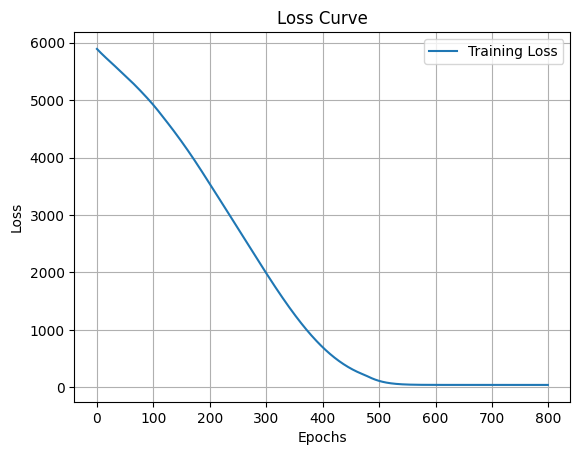

In [8]:
# Plot the loss curve
import matplotlib.pyplot as plt

# Ensure plots render properly in Jupyter
%matplotlib inline 

plt.plot(epoch_losses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.grid(True)
plt.savefig("loss_curve.png")  # Save the plot as an image
plt.show()

We first tried different learning rates (0.1, 0.01, 0.001) and epoch values (100, 500, 1000) to find the best model performance. A higher learning rate led to instability - given that we got fluctuations in the loss function - while a lower learning rate improved the convergence. We adjusted these hyperparameters one by one and monitored the loss curve. We found that the loss consistently decreased and stabilized around 500 epochs with a learning rate of 0.0001 as seen in the plot above. Note that in our code we put 800 epochs to get a better visualization of the loss curve.